#  Basic Image I/O

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy import misc

In [4]:
f = misc.face()
misc.imsave('face.png', f)

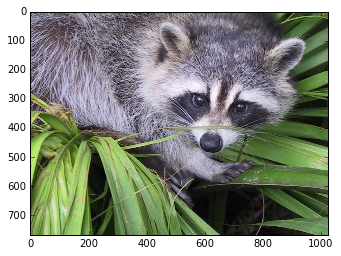

In [5]:
plt.imshow(f)


In [6]:
face = misc.face()

In [6]:
misc.imsave('face.png', face)

In [7]:
face = misc.imread('face.png')

In [7]:
face

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

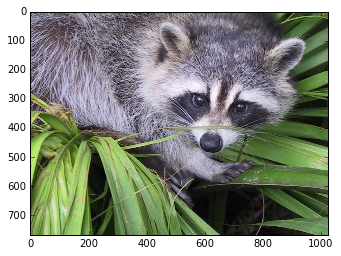

In [8]:
plt.imshow(face)

In [9]:
face.shape

(768, 1024, 3)

In [10]:
face[:,:,0] = 100

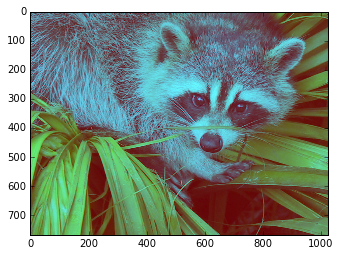

In [11]:
plt.imshow(face)

In [12]:
face[:, :, 1] = 80

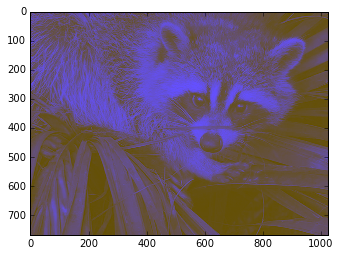

In [13]:
plt.imshow(face)

In [14]:
face.shape

(768, 1024, 3)

In [15]:
face[:, :, 0] = np.random.randint(low = 0, high = 255, size = (768, 1024))

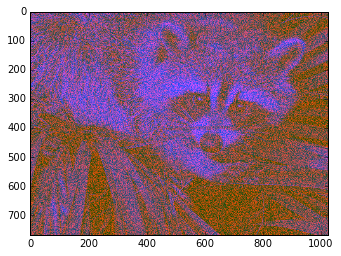

In [16]:
plt.imshow(face)

#  Reading in a Map

In [18]:
map1 = misc.imread('/Users/pfoley/globesRepository/input_images/small_sat_peters.jpg')

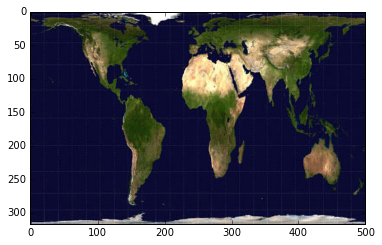

In [19]:
plt.imshow(map1)

#  Making Some Map Functions

In [254]:
map1.shape

(317, 500, 3)

In [255]:
ny, nx, _ = map1.shape

In [258]:
xs, ys = np.meshgrid(np.arange(0, nx), np.arange(0,ny))
xs.shape

(317, 500)

In [262]:
np.amin(xs), np.amax(xs), np.amin(ys), np.amax(ys)

(0, 499, 0, 316)

In [263]:
xs = xs.flatten()
ys = ys.flatten()

In [268]:
xs = xs.astype(float)
ys = ys.astype(float)

In [384]:
def longitudeAndLatitudeFromGPPixel(x, y, mapdims):
    nx, ny = mapdims
    #  GP Projection:
    #
    #  x = R lambda / sqrt(2)
    #  y = R sqrt(2) sin(phi)
    #     lambda is longitude (left right)
    #     phi is latitude (up down)
    #     R is radius of globe, we'll use 1.0
    #  lambda = (x/R) * sqrt(2)
    #  phi = arcsin((y/R) / sqrt(2))
    #
    longitude = (x * ((2.0 * np.pi / nx) + np.pi )) % (2.0 * np.pi)
    latitude = np.arcsin(2.0 * ( (y / ny) - (0.5)) )
    return(longitude, latitude)

In [270]:
longlat = longitudeAndLatitudeFromGPPixel(*grid[100][100])
longlat

(1.2566370614359386, -1.5707963267948966)

In [271]:
longs, lats = longitudeAndLatitudeFromGPPixel(xs, ys)

In [272]:
longs.shape

(158500,)

In [273]:
lats.shape

(158500,)

(array([ 15850.,  15850.,  15850.,  15850.,  15850.,  15850.,  15850.,
         15850.,  15850.,  15850.]),
 array([ 0.        ,  0.62706189,  1.25412379,  1.88118568,  2.50824757,
         3.13530947,  3.76237136,  4.38943326,  5.01649515,  5.64355704,
         6.27061894]),
 <a list of 10 Patch objects>)

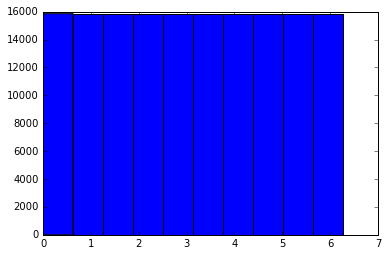

In [274]:
plt.hist(longs)

(array([  4000.,  10500.,  16500.,  20500.,  23500.,  24000.,  22000.,
         18000.,  13000.,   6500.]),
 array([-1.57079633, -1.26787609, -0.96495586, -0.66203563, -0.3591154 ,
        -0.05619517,  0.24672506,  0.5496453 ,  0.85256553,  1.15548576,
         1.45840599]),
 <a list of 10 Patch objects>)

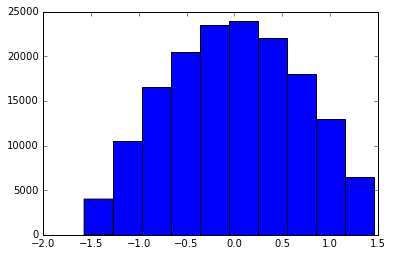

In [275]:
plt.hist(lats)

In [385]:
def spatialCoordinatesFromLongitudeAndLatitude(longitude, latitude):
    #longitude, latitude = longLat
    x = np.cos(longitude) * np.cos(latitude)
    y = np.sin(longitude) * np.cos(latitude)
    z = np.sin(latitude)
    return(x, y, z)

In [278]:
longlat

(1.2566370614359386, -1.5707963267948966)

In [277]:
xyz = spatialCoordinatesFromLongitudeAndLatitude(*longlat)
xyz

(1.8921833652169511e-17, 5.8235415924455024e-17, -1.0)

In [279]:
xxs, yys, zzs = spatialCoordinatesFromLongitudeAndLatitude(longs, lats)

(array([ 15874.,  15828.,  15856.,  15792.,  15900.,  15900.,  15792.,
         15856.,  15828.,  15874.]),
 array([-0.99999502, -0.79999602, -0.59999701, -0.39999801, -0.199999  ,
         0.        ,  0.199999  ,  0.39999801,  0.59999701,  0.79999602,
         0.99999502]),
 <a list of 10 Patch objects>)

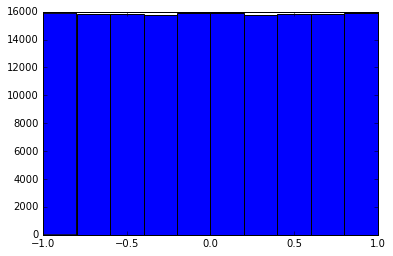

In [280]:
plt.hist(xxs)

(array([ 15874.,  15828.,  15856.,  15792.,  15900.,  15900.,  15792.,
         15856.,  15828.,  15874.]),
 array([-0.99999502, -0.79999602, -0.59999701, -0.39999801, -0.199999  ,
         0.        ,  0.199999  ,  0.39999801,  0.59999701,  0.79999602,
         0.99999502]),
 <a list of 10 Patch objects>)

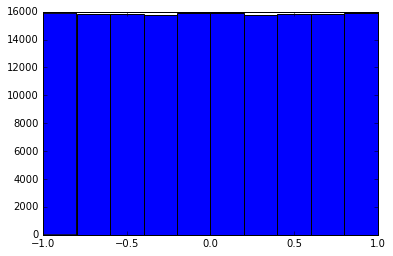

In [281]:
plt.hist(yys)

(array([ 16000.,  16000.,  15500.,  16000.,  15500.,  16000.,  16000.,
         15500.,  16000.,  16000.]),
 array([-1.        , -0.80063091, -0.60126183, -0.40189274, -0.20252366,
        -0.00315457,  0.19621451,  0.3955836 ,  0.59495268,  0.79432177,
         0.99369085]),
 <a list of 10 Patch objects>)

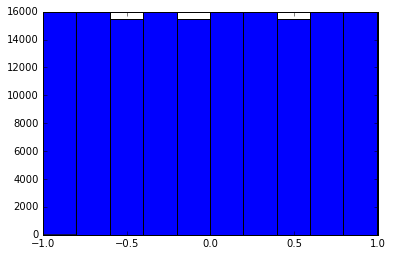

In [283]:
plt.hist(zzs)

Gall-Peters is an equal area projection, so this actually all looks fine.  

##  Make Some Rotation Matrices

In [284]:
def rotationMatrix(axis_vector, angle):
    axis_vector = axis_vector / np.sqrt(sum(axis_vector**2))
    (x, y, z) = axis_vector
    
    #  en.wikipedia.org/wiki/Rotation_matrix#Roataion matrix from axis and angle
    tensor_product_matrix = np.matrix([
            [x**2, x*y, x*z],
            [x*y, y**2, y*z],
            [x*z, y*z, z**2]
        ])
    cross_product_matrix = np.matrix([
            [0.0, -z, y],
            [z, 0.0, -x],
            [-y, x, 0.0]
        ])
    R = np.eye(3) * np.cos(angle) + \
        cross_product_matrix * np.sin(angle) + \
        tensor_product_matrix * (1 - np.cos(angle))
    
    return R

In [285]:
r_90_degrees_x = rotationMatrix(np.array([1.0, 0.0, 0.0]), np.pi/2)

In [286]:
r_90_degrees_x

matrix([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   6.12323400e-17,  -1.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,   6.12323400e-17]])

Rounding errors!  Close enough.

In [287]:
def rotationFromXYZ(angle_x, angle_y, angle_z):
    r_x = rotationMatrix(np.array([1.0, 0.0, 0.0]), angle_x)
    r_y = rotationMatrix(np.array([0.0, 1.0, 0.0]), angle_y)
    r_z = rotationMatrix(np.array([0.0, 0.0, 1.0]), angle_z)
    
    return (np.dot(np.dot(r_x, r_y), r_z))

In [288]:
test_rotation = rotationFromXYZ(np.pi/6, -np.pi/8, np.pi/10)
test_rotation

matrix([[ 0.87866165, -0.28549448, -0.38268343],
        [ 0.08563978,  0.88276695, -0.46193977],
        [ 0.46970154,  0.37311583,  0.80010315]])

##  Rotating and Back to Pixels

In [290]:
newxxyyzz =  np.dot(test_rotation, np.array([xxs, yys, zzs]))

In [324]:
test_rotation

matrix([[ 0.87866165, -0.28549448, -0.38268343],
        [ 0.08563978,  0.88276695, -0.46193977],
        [ 0.46970154,  0.37311583,  0.80010315]])

In [291]:
newxxyyzz.shape

(3, 158500)

In [310]:
new_xxs = np.squeeze(np.array(newxxyyzz[0, :]))
new_yys = np.squeeze(np.array(newxxyyzz[1, :]))
new_zzs = np.squeeze(np.array(newxxyyzz[2, :]))

Now we should still have even distribution across the sphere, let's check.

(array([ 15855.,  15846.,  15759.,  15689.,  15851.,  15851.,  16189.,
         15759.,  15846.,  15855.]),
 array([-0.99999944, -0.79999955, -0.59999966, -0.39999978, -0.19999989,
         0.        ,  0.19999989,  0.39999978,  0.59999966,  0.79999955,
         0.99999944]),
 <a list of 10 Patch objects>)

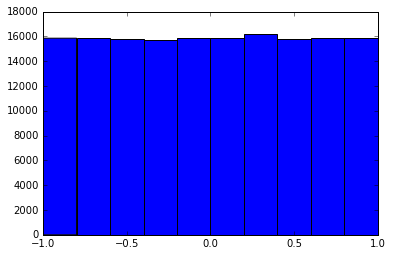

In [311]:
plt.hist(new_xxs)

(array([ 15849.,  15845.,  15605.,  15863.,  15838.,  15838.,  15863.,
         16105.,  15845.,  15849.]),
 array([ -9.99992243e-01,  -7.99993794e-01,  -5.99995346e-01,
         -3.99996897e-01,  -1.99998449e-01,   1.11022302e-16,
          1.99998449e-01,   3.99996897e-01,   5.99995346e-01,
          7.99993794e-01,   9.99992243e-01]),
 <a list of 10 Patch objects>)

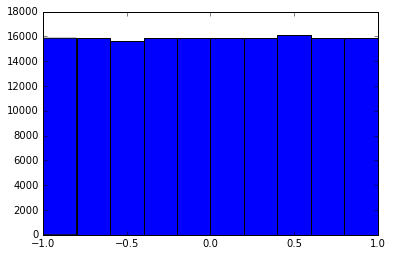

In [313]:
plt.hist(new_yys)

(array([ 16234.,  15727.,  15844.,  15862.,  15833.,  15833.,  15862.,
         15844.,  15727.,  15734.]),
 array([-0.99998945, -0.79999156, -0.59999367, -0.39999578, -0.19999789,
         0.        ,  0.19999789,  0.39999578,  0.59999367,  0.79999156,
         0.99998945]),
 <a list of 10 Patch objects>)

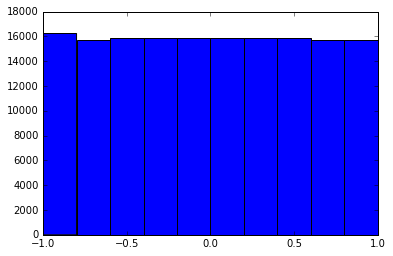

In [312]:
plt.hist(new_zzs)

In [314]:
def longitudeAndLatitudeFromSpatialCoordinates(nxs, nys, nzs):
    latitude = np.arcsin(nzs)
    longitude = np.arctan2(nys, nxs)
    longitude = (longitude + 2 * np.pi) % (2 * np.pi)
    
    return((longitude, latitude))

In [319]:
newxyz.tolist()[0]

[0.3826834323650897, 0.46193976625564337, -0.8001031451912656]

In [320]:
new_long_lat = longitudeAndLatitudeFromSpatialCoordinates(*newxyz.tolist()[0])
new_long_lat

(0.87896051315167156, -0.92746714636080896)

In [321]:
new_longs, new_lats = longitudeAndLatitudeFromSpatialCoordinates(new_xxs, new_yys, new_zzs)

Now, unless something has gone wrong, we should see a different distribution of longitudes and latitudes.  Maybe a weird one.  Shouldn't be flat, and shouldn't be the same for long and lat.

(array([ 15858.,  16087.,  15850.,  15857.,  15848.,  15857.,  15587.,
         15849.,  15857.,  15850.]),
 array([  4.34955338e-05,   6.28355664e-01,   1.25666783e+00,
          1.88498000e+00,   2.51329217e+00,   3.14160434e+00,
          3.76991651e+00,   4.39822867e+00,   5.02654084e+00,
          5.65485301e+00,   6.28316518e+00]),
 <a list of 10 Patch objects>)

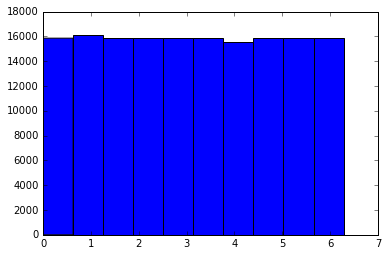

In [322]:
plt.hist(new_longs)

(array([  3967.,  11200.,  17878.,  22036.,  24419.,  24419.,  22036.,
         17378.,  11200.,   3967.]),
 array([-1.56620324, -1.25296259, -0.93972195, -0.6264813 , -0.31324065,
         0.        ,  0.31324065,  0.6264813 ,  0.93972195,  1.25296259,
         1.56620324]),
 <a list of 10 Patch objects>)

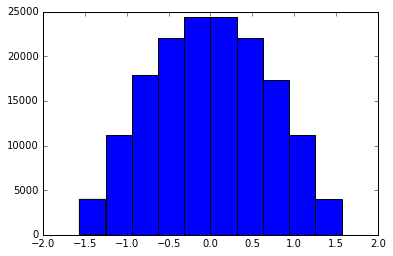

In [323]:
plt.hist(new_lats)

Uh oh.  I can't tell, but it looks way too similar to me.  

In [328]:
needs_flipping = np.greater(new_longs, np.pi)

In [329]:
flipped_longs = new_longs - needs_flipping * new_longs - needs_flipping * (2*np.pi - new_longs)

(array([ 15858.,  15587.,  15850.,  15857.,  15848.,  15857.,  16087.,
         15849.,  15857.,  15850.]),
 array([ -3.14154916e+00,  -2.51323699e+00,  -1.88492482e+00,
         -1.25661265e+00,  -6.28300485e-01,   1.16837110e-05,
          6.28323852e-01,   1.25663602e+00,   1.88494819e+00,
          2.51326036e+00,   3.14157253e+00]),
 <a list of 10 Patch objects>)

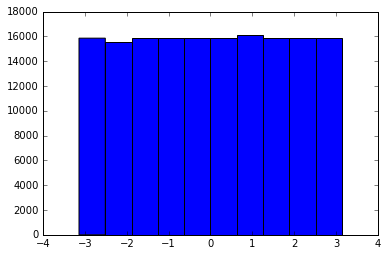

In [330]:
plt.hist(flipped_longs)

Yayyyy.....

In [386]:
def gall_peters_pixels(longitude, latitude, mapdims):
    nx, ny = mapdims
    longitude = (longitude + 2 * np.pi) % (2*np.pi)

    #  I need to flip longitudes.  
    need_to_be_flipped = np.greater(longitude, np.pi)
    longitude = longitude - need_to_be_flipped * (longitude) - need_to_be_flipped * (2*np.pi - longitude)
    
    u = nx * (0.5 + (longitude / (2*np.pi)))
    #if (np.pi <= longitude <= (2*np.pi)):
    #    u = int( nx * (longitude - np.pi) / (2*np.pi))
    
    v = (ny/2) * (np.sin(latitude)+1.0)
    
    u = u.astype(int)
    v = v.astype(int)
    
    return((u, v))

In [344]:
new_pxpy = gall_peters_pixels(*new_long_lat)
new_pxpy

(319, 31)

In [345]:
new_px, new_py = gall_peters_pixels(new_longs, new_lats)

So we went from 100, 100 to 316, 499.  Let's try with more pixels.

In [339]:
##  Making a New Image from New Pixels

In [340]:
from copy import deepcopy
map2 = deepcopy(map1)

In [341]:
new_px.shape

(158500,)

In [349]:
#min(new_px), max(new_px), min(new_py), max(new_py)
new_px.shape = (ny, nx)
new_py.shape = (ny, nx)

In [351]:
map2[:, :, 0] = map1[new_py, new_px, 0]
map2[:, :, 1] = map1[new_py, new_px, 1]
map2[:, :, 2] = map1[new_py, new_px, 2]

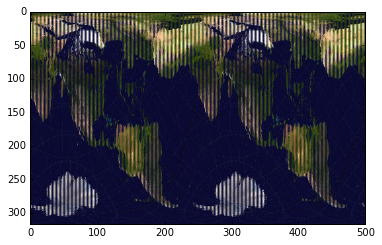

In [352]:
plt.imshow(map2)

Welp.  I broke it somehow.  Same old bug.  

##  The Whole Chain

In [390]:
def transform_map(map_image, rot_mat, debug = True):
    ny, nx, _ = map_image.shape
    mapdims = (nx, ny)
    
    if debug:
        print 'ny, nx are {} and {}'.format(ny, nx)
    xs, ys = np.meshgrid(np.arange(0, nx), np.arange(0, ny))
    xs = xs.flatten().astype(float)
    ys = ys.flatten().astype(float)
    if debug:
        print 'shape of xs and ys are {} and {}'.format(xs.shape, ys.shape)
        print 'xs min and max are {} and {}'.format(min(xs), max(xs))
        print 'ys min and max are {} and {}'.format(min(ys), max(ys))


    longs, lats = longitudeAndLatitudeFromGPPixel(xs, ys, mapdims)
    if debug:
        print 'shape of longs and lats are {} and {}'.format(longs.shape, lats.shape)
        print'longitudes histogram'
        plt.hist(longs)
        print 'latitudes histogram'
        plt.hist(lats)

    xxs, yys, zzs = spatialCoordinatesFromLongitudeAndLatitude(longs, lats)
    if debug:
        print 'pre rotation hists'
        plt.hist(xxs)
        plt.hist(yys)
        plt.hist(zzs)
    new_xxyyzz = np.dot(rot_mat, np.array([xxs, yys, zzs]))
    
    new_xxs = np.squeeze(np.array(new_xxyyzz[0, :]))
    new_yys = np.squeeze(np.array(new_xxyyzz[1, :]))
    new_zzs = np.squeeze(np.array(new_xxyyzz[2, :]))
    if debug:
        print 'post rotation hists'
        plt.hist(new_xxs)
        plt.hist(new_yys)
        plt.hist(new_zzs)

    new_longs, new_lats = longitudeAndLatitudeFromSpatialCoordinates(new_xxs, new_yys, new_zzs)
    if debug:
        print 'new longs'
        plt.hist(new_longs)
        print 'new lats'
        plt.hist(new_lats)
    new_xs, new_ys = gall_peters_pixels(new_longs, new_lats, mapdims)
    if debug:
        print 'new x pixels and new y pixels'
        plt.hist(new_xs)
        plt.hist(new_ys)

        print 'shape of new xs and new ys is '
        new_xs.shape
        new_ys.shape
    
        print 'ny, nx are {}, and {}'.format(ny, nx)
    
    
    new_xs.shape = (ny, nx)
    new_ys.shape = (ny, nx)
    
    new_map = deepcopy(map_image)
    new_map[:, :, 0] = map_image[new_ys, new_xs, 0]
    new_map[:, :, 1] = map_image[new_ys, new_xs, 1]
    new_map[:, :, 2] = map_image[new_ys, new_xs, 2]
    
    plt.imshow(new_map)
    return(new_map)

Here goes!

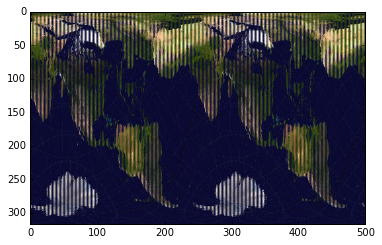

In [388]:
map3 = transform_map(map1, test_rotation)

#  Let's Try Some Big Maps!

In [367]:
othermap = misc.imread('/Users/pfoley/globesRepository/input_images/earth-huge.png')

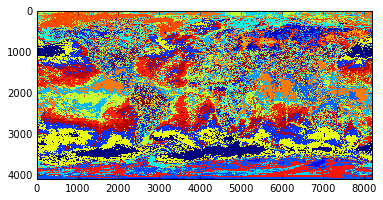

In [368]:
plt.imshow(othermap)

That's probably wrong.

In [369]:
bigmap = misc.imread('/Users/pfoley/globesRepository/input_images/bigWorld.jpg')

/usr/local/lib/python2.7/site-packages/PIL/Image.py:2215: DecompressionBombWarning: Image size (117136818 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [378]:
bigmap.shape

(7653, 15306, 3)

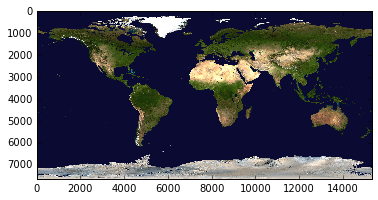

In [372]:
plt.imshow(bigmap)

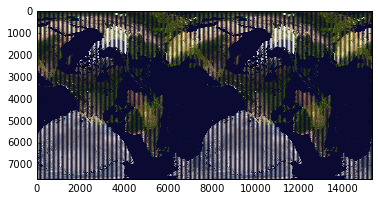

In [392]:
transformed_bigmap = transform_map(bigmap, test_rotation, debug = False)

In [395]:
misc.imsave('/Users/pfoley/Desktop/newestbigmap.png', transformed_bigmap)

##  On a Whole Grid

In [188]:
grid = np.array([ [ (px, py) for py in range(ny) ] for px in range(nx)])

In [189]:
xs = grid[:, :, 0]
ys = grid[:, :, 1]

In [135]:
r_transform = lambda p: transformPixels(p, test_rotation)
r_transform( (100, 100) )

(316, 499)

In [137]:
r_transform((xs[100, 100], ys[100, 100]))

(316, 499)

In [139]:
what = zip(xs, ys)

In [150]:
xs.shape

(317, 500)

In [151]:
ys.shape

(317, 500)